# Problem 1 - Data is in CSV files

## Attempt 1 - Pandas

In [26]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

Upload the dataset. For this demo we'll load just one dataset but you could load all the datasets

In [3]:
# Also load call_types for better definitions
call_types = pd.read_csv(
     "assets/pd_cfs_calltypes_datasd.csv",
     keep_default_na=False
)
call_types.head()

,call_type,description,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1016,PRISONER IN CUSTODY,,,
1,1016PT,PTU (PRISONER TRANSPORT),,,
2,1016QC,SHOPLIFTER/QUICK CITE,,,
3,1021,PHONE YOUR STATION,,,
4,1021H,PHONE YOUR HOME,,,


### Some Helper Scripts we built to Make sure that data was consistent on upload.

In [4]:
def convert_floats_to_ints(val):
    try:
        return int(float(val))

    except (TypeError, ValueError):
        return val


def strip_priority(val):
    try:
        return convert_floats_to_ints(val[0])

    except (TypeError, ValueError, IndexError):
        return val



In [5]:
csv_file = "assets/pd_calls_for_service_2021_datasd.csv"
df = pd.read_csv(
                csv_file,
                keep_default_na=False,
                parse_dates=["date_time"],
            )
df.head()

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority
0,E21010000001,2021-01-01 00:00:11,6,5000,,CHAPARRAL,WAY,,,,AU1,W,326,1
1,E21010000002,2021-01-01 00:00:14,6,500,,05TH,AVE,,,,1186,CAN,523,3
2,E21010000003,2021-01-01 00:00:26,6,3600,,38TH,ST,,,,AU1,DUP,839,1
3,E21010000004,2021-01-01 00:00:31,6,2700,,WORDEN,ST,,,,AU1,W,613,1
4,E21010000006,2021-01-01 00:01:20,6,800,,SAN DIEGO,PL,,,,INFO,W,121,2


## Let's See What We can Do

In [6]:
df_w_call_type = pd.merge(df, call_types[['call_type','description']], on="call_type", how="left").fillna('').drop_duplicates('incident_num')
df_w_call_type.head()

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority,description
0,E21010000001,2021-01-01 00:00:11,6,5000,,CHAPARRAL,WAY,,,,AU1,W,326,1,ALL UNITS INFORMATION-PRI 1
1,E21010000002,2021-01-01 00:00:14,6,500,,05TH,AVE,,,,1186,CAN,523,3,SPECIAL DETAIL
2,E21010000003,2021-01-01 00:00:26,6,3600,,38TH,ST,,,,AU1,DUP,839,1,ALL UNITS INFORMATION-PRI 1
3,E21010000004,2021-01-01 00:00:31,6,2700,,WORDEN,ST,,,,AU1,W,613,1,ALL UNITS INFORMATION-PRI 1
4,E21010000006,2021-01-01 00:01:20,6,800,,SAN DIEGO,PL,,,,INFO,W,121,2,INFORMATION FOR DISPATCHERS


## The last line is a little ugly let's explain

`pd.merge` - combine the our `call types` data with our actual stop data.

`.fillna` - creates consistency with the rest of our empty fields (replacing NaN/NA values)

`.drop_duplicates` - not sure why duplicates are created but this is common and I discovered that removing the duplicates on the `incident_num` (unique for each call) seems to resolve the issue.


## Can we make sense of this data?

In [7]:
# we're goign to create a sorting help function

def sort_group(group):
    return sorted(group, key=lambda x:len(x[1]), reverse=True)

df_w_call_type["beat"] = df_w_call_type["beat"].apply(convert_floats_to_ints)
df_w_call_type["priority"] = df_w_call_type["priority"].apply(strip_priority)

In [8]:
#  Calls per Beat in 2021

grouped_beats = sort_group(df_w_call_type.groupby('beat'))

for beat, group in grouped_beats[:10]:
    num_of_calls = len(group)
    print(f"{beat=}, {num_of_calls=}")

beat=521, num_of_calls=17040
beat=122, num_of_calls=14642
beat=524, num_of_calls=11469
beat=611, num_of_calls=11064
beat=813, num_of_calls=9034
beat=627, num_of_calls=9004
beat=512, num_of_calls=8779
beat=313, num_of_calls=8162
beat=614, num_of_calls=8116
beat=124, num_of_calls=6913


In [9]:
# Beat 523 Calls

beat_523 = df_w_call_type[df_w_call_type.beat==523]
beat_523.head()

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority,description
1,E21010000002,2021-01-01 00:00:14,6,500,,05TH,AVE,,,,1186,CAN,523,3,SPECIAL DETAIL
64,E21010000068,2021-01-01 00:28:49,6,500,,ISLAND,AVE,,,,586,O,523,4,ILLEGAL PARKING
76,E21010000081,2021-01-01 00:36:31,6,0,,05TH,AVE,,F,,415,CAN,523,2,DISTURBING PEACE
242,E21010000253,2021-01-01 03:42:25,6,900,,05TH,AVE,,,,1087,K,523,2,MEET OFFICER NON URGENT
262,E21010000274,2021-01-01 04:20:58,6,0,,04TH,AVE,,F,,415N,K,523,3,DISTURBING PEACE NOISE ONLY


In [10]:
# Busiest Intersections for Beat 523

intersections = beat_523[beat_523.address_road_intersecting != '']
grouped_beats = sort_group(intersections.groupby(['address_road_primary', 'address_road_intersecting']))

for intersection, group in grouped_beats[:5]:
    num_of_calls = len(group)
    print(f"{intersection=}, {num_of_calls=}")

intersection=('05TH', 'MARKET'), num_of_calls=314
intersection=('05TH', 'G'), num_of_calls=168
intersection=('05TH', 'BROADWAY'), num_of_calls=138
intersection=('05TH', 'F'), num_of_calls=132
intersection=('04TH', 'G'), num_of_calls=118


<AxesSubplot:>

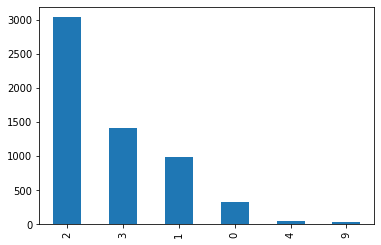

In [11]:
beat_523['priority'].value_counts().plot(kind="bar")

<AxesSubplot:>

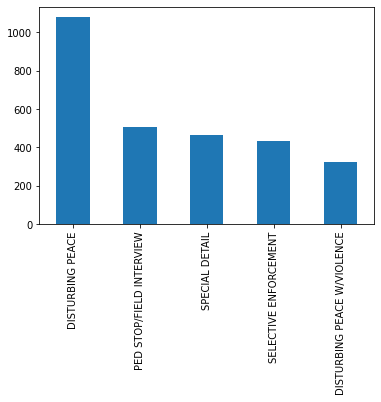

In [12]:
beat_523['description'].value_counts()[:5].plot(kind="bar")

# This is great but a little narrow 
## Let's Load Data into Elasticsearch

## Why Though?

- Offload Storage and Processing to Server
- Visualization Tools (Kibana Lens)

## Let's Look at our Traditional Option

In [2]:
from elasticsearch import Elasticsearch
from elasticsearch.helpers import bulk
import os

# Load Client
client = Elasticsearch(
    hosts=[os.environ["ES_HOST"]],  # for local instance
)

# upload data to Elasticsearch (because we have the data loaded into pandas we can just export the dataframe to json)
#bulk(client=client, index='test_2021_index', actions=df_w_call_type.to_dict('records'))    

## Cool Data is in and we can work with it in Kibana

# But what did all the work (pandas)

`# upload data to Elasticsearch (because we have the data loaded into pandas we can just export the dataframe to json)`

## How do we work with the data in python if we start with the data in Elasticsearch?

In [15]:
results = client.search(
    index="pd_calls_for_service*",
    body={
        "query": {
            "match_all": {}
       }
    })['hits']['hits']

new_df = pd.DataFrame([x['_source'] for x in results])
new_df.head()

len(new_df)

10

## Can we make changes to this data?

[Let's check this](http://jays-mac-mini-3.local:5601/app/dashboards#/view/b5c671c0-3e71-11eb-b5a2-43487ca632dc?_g=(filters:!(),refreshInterval:(pause:!t,value:0),time:(from:now-8y,to:now))&_a=(description:'',filters:!(),fullScreenMode:!f,options:(hidePanelTitles:!f,useMargins:!t),panels:!((embeddableConfig:(),gridData:(h:26,i:'8ad5d19f-c5e0-41c9-89b4-03c6a1e8b09a',w:12,x:0,y:0),id:'13720c30-3f35-11eb-b5a2-43487ca632dc',panelIndex:'8ad5d19f-c5e0-41c9-89b4-03c6a1e8b09a',type:visualization,version:'7.10.0'),(embeddableConfig:(hiddenLayers:!(),isLayerTOCOpen:!f,mapCenter:(lat:32.82517,lon:-116.91398,zoom:8.11),openTOCDetails:!()),gridData:(h:14,i:'40a2aa29-3a4f-4bc6-b5fc-65f97926ede3',w:32,x:12,y:0),id:'4f55ff10-3f33-11eb-b5a2-43487ca632dc',panelIndex:'40a2aa29-3a4f-4bc6-b5fc-65f97926ede3',type:map,version:'7.10.0'),(embeddableConfig:(),gridData:(h:12,i:ea97ada1-6535-42f9-8881-2d616d70a134,w:10,x:23,y:14),id:a939c2c0-3e9b-11eb-b5a2-43487ca632dc,panelIndex:ea97ada1-6535-42f9-8881-2d616d70a134,type:visualization,version:'7.10.0'),(embeddableConfig:(),gridData:(h:12,i:'9fdc5b9f-5f85-4aef-a066-f74c1df2b5cf',w:11,x:33,y:14),id:'1460f8c0-3e74-11eb-b5a2-43487ca632dc',panelIndex:'9fdc5b9f-5f85-4aef-a066-f74c1df2b5cf',type:visualization,version:'7.10.0'),(embeddableConfig:(),gridData:(h:13,i:e18eb168-dc4f-4bb7-83a3-ccb262d34f85,w:12,x:0,y:26),id:c3b65300-3f33-11eb-b5a2-43487ca632dc,panelIndex:e18eb168-dc4f-4bb7-83a3-ccb262d34f85,type:visualization,version:'7.10.0'),(embeddableConfig:(),gridData:(h:13,i:'3c0c0e0f-b33c-4971-a8bf-8a2a7fc2c63a',w:32,x:12,y:26),id:f68052b0-3e9b-11eb-b5a2-43487ca632dc,panelIndex:'3c0c0e0f-b33c-4971-a8bf-8a2a7fc2c63a',type:lens,version:'7.10.0'),(embeddableConfig:(),gridData:(h:11,i:'75a467b0-b343-44dd-a547-d144a9ef629e',w:44,x:0,y:39),id:'7f47ea40-3e74-11eb-b5a2-43487ca632dc',panelIndex:'75a467b0-b343-44dd-a547-d144a9ef629e',type:lens,version:'7.10.0'),(embeddableConfig:(),gridData:(h:15,i:'01918722-445d-4dbd-ace3-0b5f488afd5b',w:44,x:0,y:50),id:fd2eca90-3e75-11eb-b5a2-43487ca632dc,panelIndex:'01918722-445d-4dbd-ace3-0b5f488afd5b',type:lens,version:'7.10.0')),query:(language:kuery,query:''),timeRestore:!f,title:'PD%20Calls%20Overtime',viewMode:edit))

Yes, but...
In order to do this we need to make the changes in the dataframe and then re-upload.

## Let's talk about [Eland](https://eland.readthedocs.io/en/7.10.1b1/#)

## Eland is Elasticsearch data in a Dataframe view

It's like

```python
results = client.search(
    body={
        "size": 3,
        "query": {
            "match_all": {}
       }
    })['hits']['hits']

new_df = pd.DataFrame([x['_source'] for x in results])
```

but `new_df` is connected to your Elasticsearch instance.

In [23]:
import eland


# all things Elasticsearch use 'es_' as a prefix
query = {
  "query": {
    "simple_query_string": {
        "query": '523 description:"Special Detail"',
        "fields": [
            "beat",
            "description"]
    }
  }
}
edf = eland.DataFrame(
    es_client=client,
    es_index_pattern="pd_calls_for_service*",
    )

edf.count()

address_dir_intersecting     3869775
address_dir_primary          3869775
address_number_primary       3869775
address_road_intersecting    3869775
address_road_primary         3869775
address_sfx_intersecting     3869775
address_sfx_primary          3869775
beat                         3869775
call_type                    3869775
date_time                    3869775
day_of_week                  3869775
description                  3869775
disposition                  3869775
incident_num                 3869775
priority                     3869775
dtype: int64

In [24]:
edf.head()

,address_dir_intersecting,address_dir_primary,address_number_primary,address_road_intersecting,address_road_primary,address_sfx_intersecting,address_sfx_primary,beat,call_type,date_time,day_of_week,description,disposition,incident_num,priority
4316,,,0,,BALBOA PARK,,,531,DEMO,2015-01-03 11:01:50,5,DEMONSTRATION CALLS,O,P15010004267,2
48781,,,5200,,EL CAJON,,BL,824,11-6,2016-01-29 23:30:18,4,DISCHARGING FIREARMS,U,P16010048115,1
80880,,,2500,,CARRIAGEDALE,,RW,124,459,2017-02-16 23:11:59,3,BURGLARY IN PROGRESS,U,P17020027838,1
16174,,,5300,,EMERALD CREST COURT,,,725,1185,2018-01-11 09:09:14,3,REQUEST FOR TOW TRUCK,O,E18010015890,3
43860,,,300,,DATE,,ST,529,602,2019-01-28 00:59:06,0,TRESPASSING,K,E19010042425,2


In [ ]:
# Compared to our original
beat_523

In [5]:
ebeat_523 = edf[edf.beat==523]

In [ ]:
beat_523['description'].value_counts()[:5].plot(kind="bar")

<AxesSubplot:>

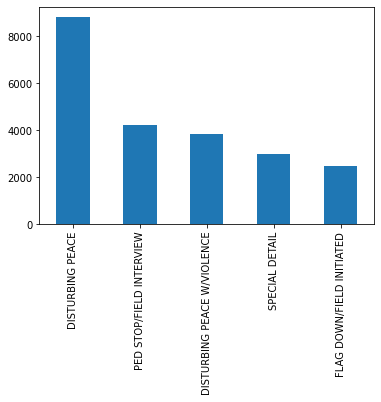

In [7]:
ebeat_523['description'].value_counts()[:5].plot(kind="bar")

<AxesSubplot:>

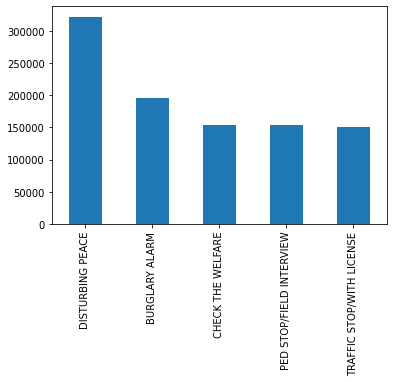

In [25]:
sd_pd_data = eland.DataFrame(es_client=client, es_index_pattern="pd_calls_for_service_*")
sd_pd_data['description'].value_counts()[:5].plot(kind="bar")